In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/datasets/credit_fraud_detection/fraudTrain.csv')
df = pd.read_csv('data/fraudTrain.csv')

In [3]:
df.shape

(1296675, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [6]:
df.corr(numeric_only=True)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


In [7]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [8]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df.drop(columns = ['Unnamed: 0','first','last','street','city','state','zip', 'merchant', 'dob','trans_num','merch_lat', 'merch_long'],inplace = True)

In [10]:
df.shape

(1296675, 11)

In [11]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,job,unix_time,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0


In [12]:
df.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [13]:
sample_df = df.sample(n=10000, random_state=42)

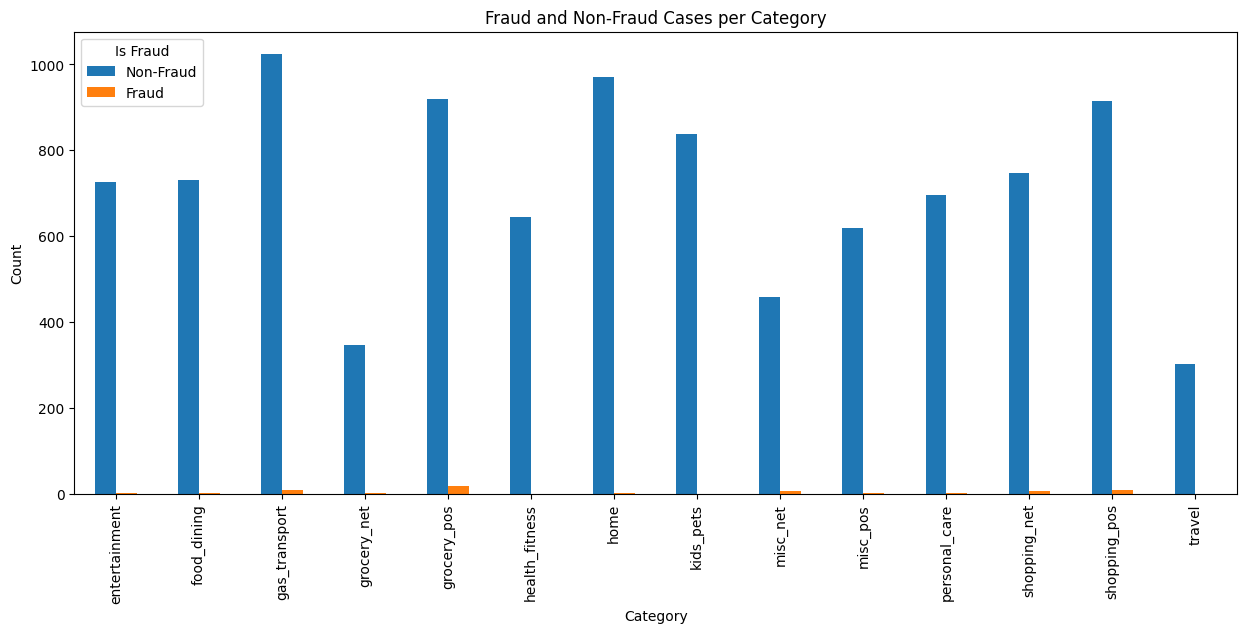

In [14]:

fraud_counts = sample_df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)

# Plotting
fraud_counts.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Fraud and Non-Fraud Cases per Category')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

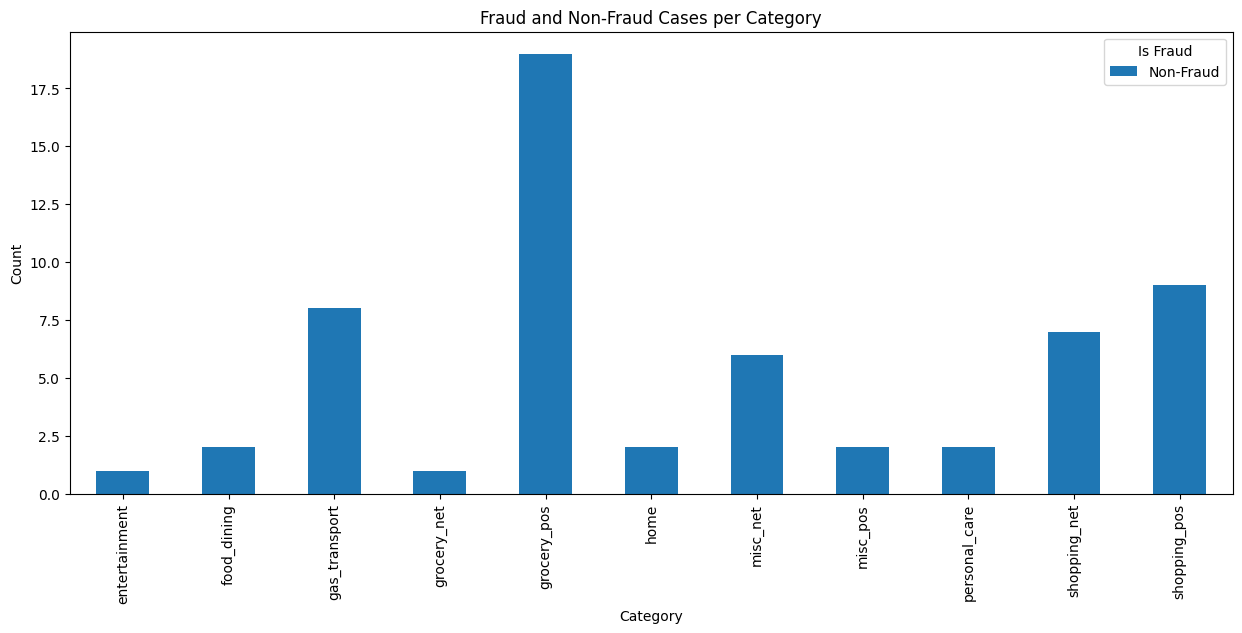

In [15]:
fraud_counts_1 = sample_df[sample_df['is_fraud'] == 1].groupby('category')[ 'is_fraud'].count()
# Plotting
fraud_counts_1.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Fraud and Non-Fraud Cases per Category')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

gender
F    709863
M    586812
Name: count, dtype: int64


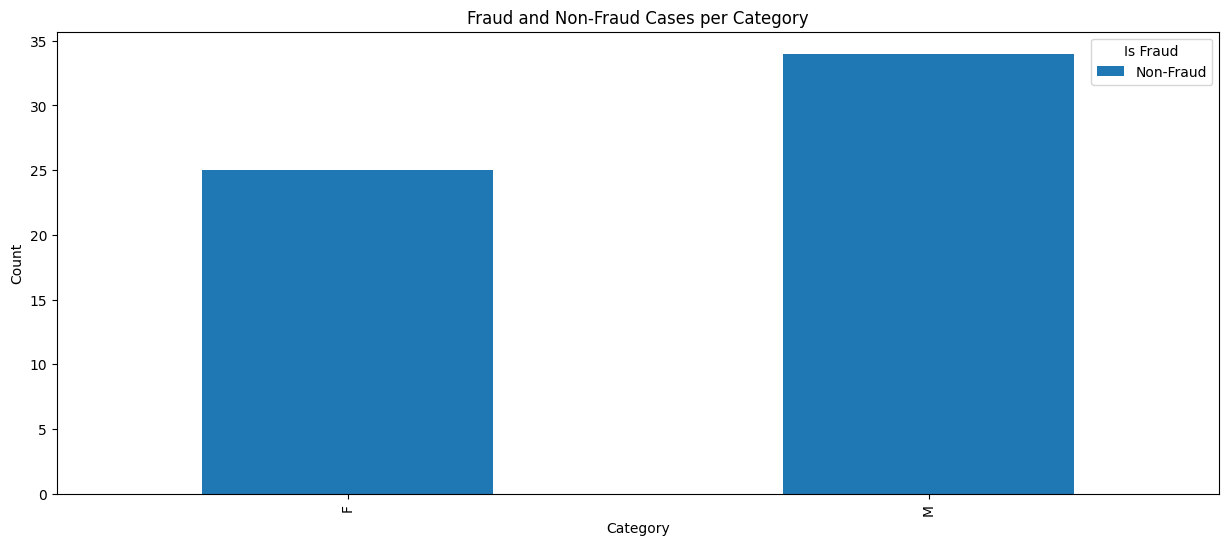

In [16]:
print(df['gender'].value_counts())
gender_counts = sample_df[sample_df['is_fraud'] == 1].groupby('gender')[ 'is_fraud'].count()
# Plotting
gender_counts.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Fraud and Non-Fraud Cases per Category')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

In [17]:
df['gender'].replace({'F': 0, 'M' : 1}, inplace = True)

/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_2883/618705161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F': 0, 'M' : 1}, inplace = True)
/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_2883/618705161.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [18]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,job,unix_time,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,1,46.2306,-112.1138,1939,Patent attorney,1325376076,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0


In [19]:
category_df = (pd.get_dummies(df['category'])).astype('int')

In [20]:
category_df

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df.drop(columns=['category'], inplace = True)

In [22]:
df = pd.concat([category_df,df], axis =1)

In [23]:
df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,trans_date_trans_time,cc_num,amt,gender,lat,long,city_pop,job,unix_time,is_fraud
0,0,0,0,0,0,0,0,0,1,0,...,2019-01-01 00:00:18,2703186189652095,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0
1,0,0,0,0,1,0,0,0,0,0,...,2019-01-01 00:00:44,630423337322,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0
2,1,0,0,0,0,0,0,0,0,0,...,2019-01-01 00:00:51,38859492057661,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0
3,0,0,1,0,0,0,0,0,0,0,...,2019-01-01 00:01:16,3534093764340240,45.00,1,46.2306,-112.1138,1939,Patent attorney,1325376076,0
4,0,0,0,0,0,0,0,0,0,1,...,2019-01-01 00:03:06,375534208663984,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0


In [24]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second

df.drop('trans_date_trans_time', axis=1, inplace=True)

In [25]:
print(df.cc_num.dtype)
print(df.job.value_counts())

int64
job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64


In [26]:
df.shape

(1296675, 29)

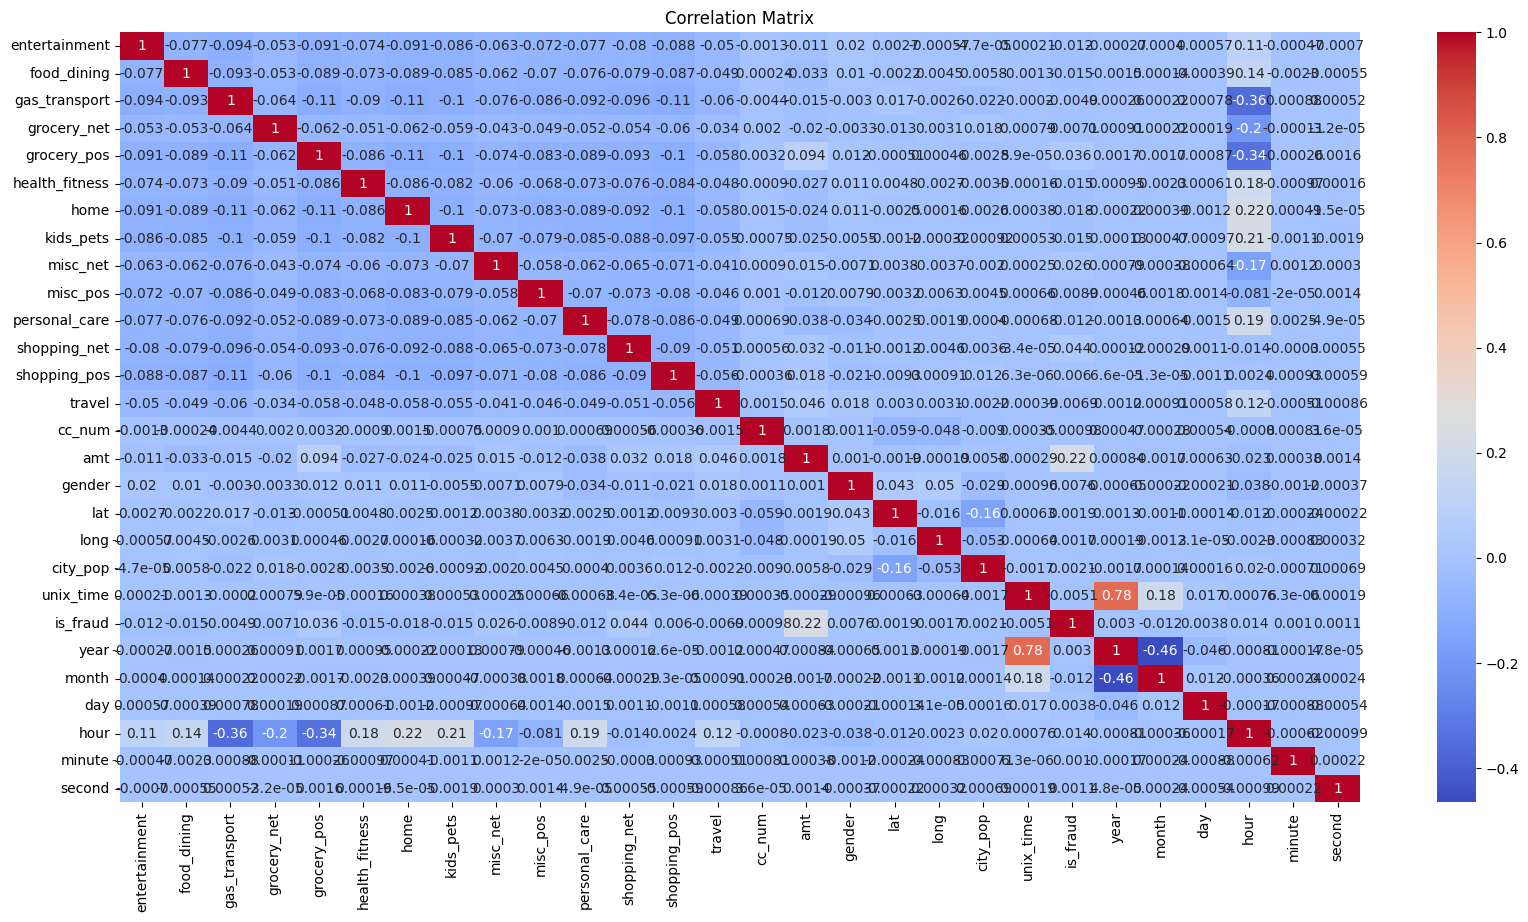

In [27]:
import seaborn as sns
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
correlation_with_target = correlation_matrix['is_fraud'].sort_values(ascending=False)
print(correlation_with_target)

is_fraud          1.000000
amt               0.219404
shopping_net      0.044261
grocery_pos       0.035558
misc_net          0.025886
hour              0.013799
gender            0.007642
shopping_pos      0.005955
day               0.003848
year              0.003004
city_pop          0.002136
lat               0.001894
long              0.001721
second            0.001095
minute            0.001033
cc_num           -0.000981
gas_transport    -0.004851
unix_time        -0.005078
travel           -0.006924
grocery_net      -0.007136
misc_pos         -0.008937
personal_care    -0.012167
entertainment    -0.012200
month            -0.012409
health_fitness   -0.014885
kids_pets        -0.014967
food_dining      -0.015025
home             -0.017848
Name: is_fraud, dtype: float64


In [29]:
frequency_encoding = df['job'].value_counts().to_dict()
df['job_encoded'] = df['job'].map(frequency_encoding)

In [30]:
df.drop(columns = ['job'], inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   entertainment   1296675 non-null  int64  
 1   food_dining     1296675 non-null  int64  
 2   gas_transport   1296675 non-null  int64  
 3   grocery_net     1296675 non-null  int64  
 4   grocery_pos     1296675 non-null  int64  
 5   health_fitness  1296675 non-null  int64  
 6   home            1296675 non-null  int64  
 7   kids_pets       1296675 non-null  int64  
 8   misc_net        1296675 non-null  int64  
 9   misc_pos        1296675 non-null  int64  
 10  personal_care   1296675 non-null  int64  
 11  shopping_net    1296675 non-null  int64  
 12  shopping_pos    1296675 non-null  int64  
 13  travel          1296675 non-null  int64  
 14  cc_num          1296675 non-null  int64  
 15  amt             1296675 non-null  float64
 16  gender          1296675 non-null  in

In [32]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [33]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X,y)

In [35]:
X

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,long,city_pop,unix_time,year,month,day,hour,minute,second,job_encoded
0,0,0,0,0,0,0,0,0,1,0,...,-81.1781,3495,1325376018,2019,1,1,0,0,18,3545
1,0,0,0,0,1,0,0,0,0,0,...,-118.2105,149,1325376044,2019,1,1,0,0,44,5099
2,1,0,0,0,0,0,0,0,0,0,...,-112.2620,4154,1325376051,2019,1,1,0,0,51,511
3,0,0,1,0,0,0,0,0,0,0,...,-112.1138,1939,1325376076,2019,1,1,0,1,16,2530
4,0,0,0,0,0,0,0,0,0,1,...,-79.4629,99,1325376186,2019,1,1,0,3,6,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578333,0,0,0,0,0,0,0,0,0,0,...,-88.4927,31702,1369829485,2020,5,28,22,48,41,5118
2578334,0,0,0,0,0,0,0,0,0,0,...,-100.6215,4005,1346983786,2019,9,7,1,22,15,1553
2578335,0,0,0,0,0,0,0,0,0,0,...,-97.4735,121,1330217320,2019,2,25,11,46,35,1545
2578336,0,0,0,0,0,0,0,0,0,0,...,-84.5964,217,1339450500,2019,6,11,21,18,19,5118


In [36]:
y

0          0
1          0
2          0
3          0
4          0
          ..
2578333    1
2578334    1
2578335    1
2578336    1
2578337    1
Name: is_fraud, Length: 2578338, dtype: int64

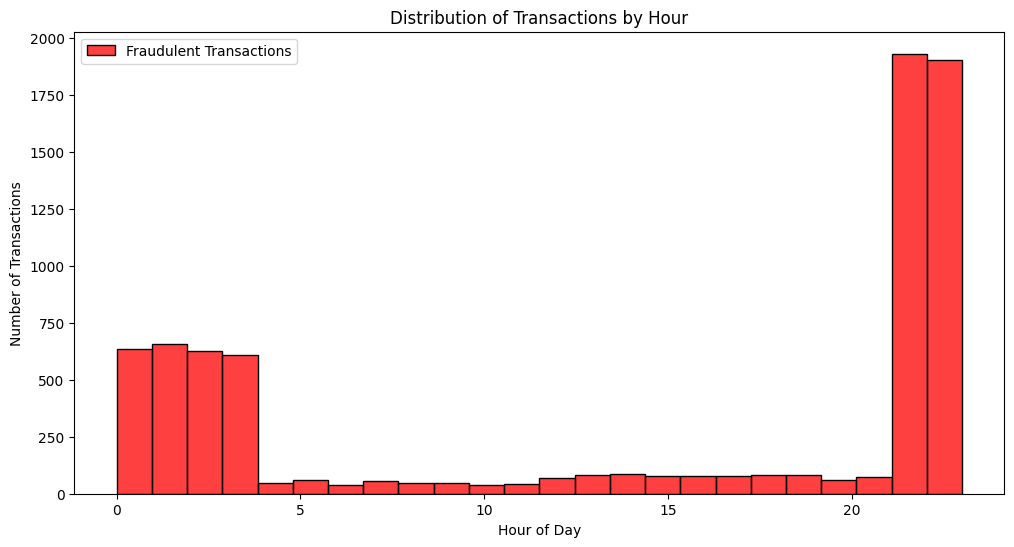

In [76]:
plt.figure(figsize=(12, 6))
#sns.histplot(df['hour'], bins=24, kde=False, color='blue', label='All Transactions')
sns.histplot(df[df['is_fraud'] == 1]['hour'], bins=24, kde=False, color='red', label='Fraudulent Transactions')
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

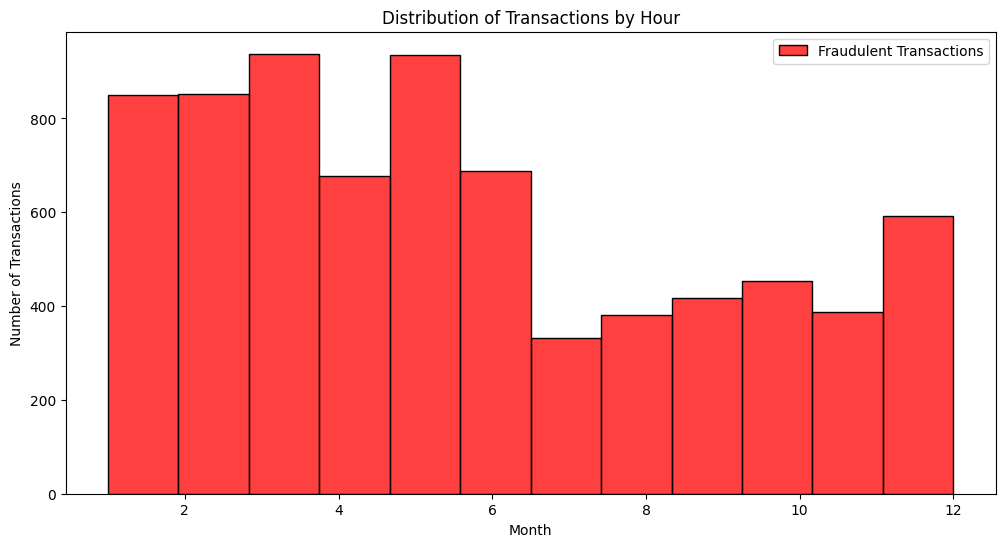

In [78]:
plt.figure(figsize=(12, 6))
#sns.histplot(df['hour'], bins=24, kde=False, color='blue', label='All Transactions')
sns.histplot(df[df['is_fraud'] == 1]['month'], bins=12, kde=False, color='red', label='Fraudulent Transactions')
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

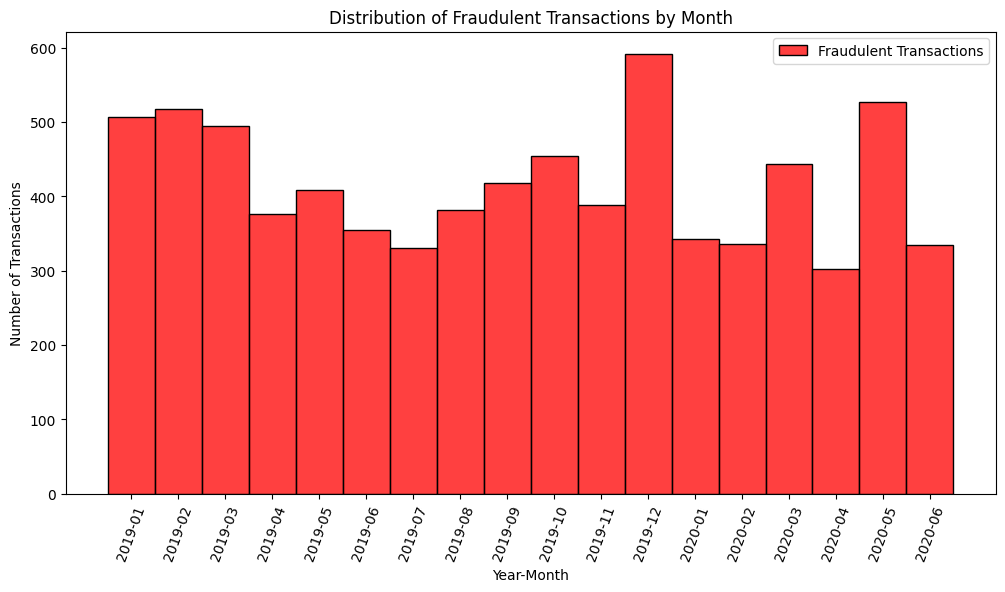

In [90]:
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
sns.histplot(df[df['is_fraud'] == 1]['year_month'], bins=len(df['year_month'].unique()), kde=False, color='red', label='Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [85]:
df.drop(columns = ['year_month'],inplace = True)

In [77]:
sorted(df['hour'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [86]:
df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,city_pop,unix_time,is_fraud,year,month,day,hour,minute,second,job_encoded
0,0,0,0,0,0,0,0,0,1,0,...,3495,1325376018,0,2019,1,1,0,0,18,3545
1,0,0,0,0,1,0,0,0,0,0,...,149,1325376044,0,2019,1,1,0,0,44,5099
2,1,0,0,0,0,0,0,0,0,0,...,4154,1325376051,0,2019,1,1,0,0,51,511
3,0,0,1,0,0,0,0,0,0,0,...,1939,1325376076,0,2019,1,1,0,1,16,2530
4,0,0,0,0,0,0,0,0,0,1,...,99,1325376186,0,2019,1,1,0,3,6,2017


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_2883/1791849624.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5.41453976e-04 1.14176199e-07 7.77171158e-06 ... 9.08020654e-07
 8.82158578e-07 5.03220719e-04]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:] = scaler.fit_transform(X)
/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_2883/1791849624.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.19449117e-03 4.33484697e-05 1.42121054e-03 ... 3.37154765e-05
 6.67428820e-05 4.61121067e-02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:] = scaler.fit_transform(X)
/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_2883/1791849624.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in 

In [39]:
X

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,long,city_pop,unix_time,year,month,day,hour,minute,second,job_encoded
0,0,0,0,0,0,0,0,0,1,0,...,0.864638,0.001194,0.000000e+00,0,0.000000,0.000000,0.000000,0.000000,0.305085,0.362055
1,0,0,0,0,1,0,0,0,0,0,...,0.485682,0.000043,5.598526e-07,0,0.000000,0.000000,0.000000,0.000000,0.745763,0.521081
2,1,0,0,0,0,0,0,0,0,0,...,0.546553,0.001421,7.105821e-07,0,0.000000,0.000000,0.000000,0.000000,0.864407,0.051576
3,0,0,1,0,0,0,0,0,0,0,...,0.548070,0.000659,1.248902e-06,0,0.000000,0.000000,0.000000,0.016949,0.271186,0.258187
4,0,0,0,0,0,0,0,0,0,1,...,0.882190,0.000026,3.617509e-06,0,0.000000,0.000000,0.000000,0.050847,0.101695,0.205690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578333,0,0,0,0,0,0,0,0,0,0,...,0.789787,0.010899,9.572072e-01,1,0.363636,0.900000,0.956522,0.813559,0.694915,0.523025
2578334,0,0,0,0,0,0,0,0,0,0,...,0.665672,0.001370,4.652755e-01,0,0.727273,0.200000,0.043478,0.372881,0.254237,0.158207
2578335,0,0,0,0,0,0,0,0,0,0,...,0.697886,0.000034,1.042467e-01,0,0.090909,0.800000,0.478261,0.779661,0.593220,0.157388
2578336,0,0,0,0,0,0,0,0,0,0,...,0.829659,0.000067,3.030629e-01,0,0.454545,0.333333,0.913043,0.305085,0.322034,0.523025


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2062670, 28), (515668, 28), (2062670,), (515668,))

In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
model = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape=(28,),activation= 'relu'),
        keras.layers.Dense(30, activation= 'relu'),
        keras.layers.Dense(1, activation= 'sigmoid'),
    ]
)

model.compile(optimizer= 'adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train,y_train, epochs = 50, batch_size  = 200)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-16 11:59:22.600929: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-16 11:59:22.600962: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-16 11:59:22.600972: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-16 11:59:22.601044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-16 11:59:22.601062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_

Epoch 1/50


2024-07-16 11:59:23.382774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10314/10314 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.9437 - loss: 0.1578
Epoch 2/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.9761 - loss: 0.0675
Epoch 3/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.9788 - loss: 0.0560
Epoch 4/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9828 - loss: 0.0467
Epoch 5/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9859 - loss: 0.0383
Epoch 6/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9876 - loss: 0.0334
Epoch 7/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9882 - loss: 0.0311
Epoch 8/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9888 - loss: 0.0296
Epoch 9/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9893 - loss: 0.0282
Epoch 10/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9893 - loss: 0.0276
Epoch 11/50
10314/10314 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9898 - loss: 0.0263
Epoch 12

In [45]:
loss, accuracy = model.evaluate(X_test,y_test)
print(accuracy * 100)

16115/16115 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9941 - loss: 0.0173
99.40969944000244


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,513 (44.98 KB)

 Trainable params: 3,837 (14.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,676 (29.99 KB)

In [47]:
pred = model.predict(X_test)

16115/16115 ━━━━━━━━━━━━━━━━━━━━ 13s 790us/step


In [48]:
binary_pred = ((pred>0.5)).astype('int')

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,binary_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    257834
           1       0.99      0.99      0.99    257834

    accuracy                           0.99    515668
   macro avg       0.99      0.99      0.99    515668
weighted avg       0.99      0.99      0.99    515668



In [50]:
print(confusion_matrix(y_test,binary_pred))

[[256283   1551]
 [  1493 256341]]
